# Practice Exercise - Movies

In this assignment, you will try to find some interesting insights into a few movies released between 1916 and 2016, using Python. You will have to download a movie dataset, write Python code to explore the data, gain insights into the movies, actors, directors, and collections, and submit the code.

#### Some tips before starting the assignment

1. Identify the task to be performed correctly, and only then proceed to write the required code. Don’t perform any incorrect analysis or look for information that isn’t required for the assignment.
2. In some cases, the variable names have already been assigned, and you just need to write code against them. In other cases, the names to be given are mentioned in the instructions. We strongly advise you to use the mentioned names only.
3. Always keep inspecting your data frame after you have performed a particular set of operations.
4. There are some checkpoints given in the IPython notebook provided. They're just useful pieces of information you can use to check if the result you have obtained after performing a particular task is correct or not.
5. Note that you will be asked to refer to documentation for solving some of the questions. That is done on purpose for you to learn new commands and also how to use the documentation.

In [2]:
# import libraries
import numpy as np
import pandas as pd

### Task 1: Reading and Inspection

**Subtask 1.1: Import and read**

Import and read the movie database. Store it in a variable called `movies`.

In [3]:
# read the "movies" csv file
movies = pd.read_csv("movies.csv")

**Subtask 1.2: Inspect the dataframe**

Inspect the dataframe's columns, shapes, variable types etc.

In [11]:
df = pd.DataFrame(movies, index=None)
 
# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
 
print(df)
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)
print((movies.isnull().sum()>0).sum())

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4     Color     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
3848  Color      Shane Carruth                   143.0      77.0   
3849  Color   Neill Dela Llana                    35.0      80.0   
3850  Color   Robert Rodriguez                    56.0      81.0   
3851  Color       Edward Burns                    14.0      95.0   
3852  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0

#### <font color='red'>Question 1: How many rows and columns are present in the dataframe? </font>
-  <font color='red'>(3821, 26)</font>
-  <font color='red'>(3879, 28)</font>
-  <font color='red'>(3853, 28)</font>
-  <font color='red'>(3866, 26)</font>

#### <font color='red'>Question 2: How many columns have null values present in them? Try writing a code for this instead of counting them manually.</font>

-  <font color='red'>3</font>
-  <font color='red'>6</font>
-  <font color='red'>9</font>
-  <font color='red'>12</font>

### Task 2: Cleaning the Data

**Subtask 2.1: Drop unecessary columns**

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [12]:
round(100*(movies.isnull().sum()/len(movies.index)),2)

color                        0.05
director_name                0.00
num_critic_for_reviews       0.03
duration                     0.03
director_facebook_likes      0.00
actor_3_facebook_likes       0.16
actor_2_name                 0.03
actor_1_facebook_likes       0.00
gross                        0.00
genres                       0.00
actor_1_name                 0.00
movie_title                  0.00
num_voted_users              0.00
cast_total_facebook_likes    0.00
actor_3_name                 0.16
facenumber_in_poster         0.16
plot_keywords                0.78
movie_imdb_link              0.00
num_user_for_reviews         0.00
language                     0.10
country                      0.00
content_rating               1.25
budget                       0.00
title_year                   0.00
actor_2_facebook_likes       0.03
imdb_score                   0.00
aspect_ratio                 1.87
movie_facebook_likes         0.00
dtype: float64

#### <font color='red'>Question 3: What is the count of columns in the new dataframe? </font>
-  <font color='red'>10</font>
-  <font color='red'>13</font>
-  <font color='red'>15</font>
-  <font color='red'>17</font>

**Subtask 2.2: Inspect Null values**

As you have seen above, there are null values in multiple columns of the dataframe 'movies'. Find out the percentage of null values in each column of the dataframe 'movies'. 

In [13]:
movies.loc[pd.isnull(movies['language']), ['language']] = 'English'
(movies.language == 'English').sum()

3675

#### <font color='red'>Question 4: Which column has the highest percentage of null values? </font>
-  <font color='red'>language</font>
-  <font color='red'>genres</font>
-  <font color='red'>num_critic_for_reviews</font>
-  <font color='red'>imdb_score</font>

**Subtask 2.3: Fill NaN values**

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [15]:
movies['profit']=movies['gross']-movies['budget']
top_10=movies.sort_values(by='profit',ascending=False).head(10)
print(top_10)

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
28    Color    Colin Trevorrow                   644.0     124.0   
25    Color      James Cameron                   315.0     194.0   
2704  Color       George Lucas                   282.0     125.0   
2748  Color   Steven Spielberg                   215.0     120.0   
16    Color        Joss Whedon                   703.0     173.0   
482   Color       Roger Allers                   186.0      73.0   
230   Color       George Lucas                   320.0     136.0   
64    Color  Christopher Nolan                   645.0     152.0   
419   Color          Gary Ross                   673.0     142.0   

      director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
0                         0.0                   855.0   Joel David Moore   
28                      365.0                  1000.0         Judy Greer   
25                     

#### <font color='red'>Question 5: What is the count of movies made in English language after replacing the NaN values with English? </font>
-  <font color='red'>3670</font>
-  <font color='red'>3674</font>
-  <font color='red'>3668</font>
-  <font color='red'>3672</font>

### Task 3: Data Analysis

**Subtask 3.1: Change the unit of columns**

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

**Subtask 3.2: Find the movies with highest profit**

   1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
   2. Sort the dataframe using the `profit` column as reference. (Find which command can be used here to sort entries from the documentation)
   3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

**Checkpoint:** You might spot two movies directed by `James Cameron` in the list.

#### <font color='red'>Question 6: Which movie is ranked 5th from the top in the list obtained? </font>
-  <font color='red'>E.T. the Extra-Terrestrial</font>
-  <font color='red'>The Avengers</font>
-  <font color='red'>The Dark Knight</font>
-  <font color='red'>Titanic</font>

**Subtask 3.3: Find IMDb Top 250**

Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000. 

Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.

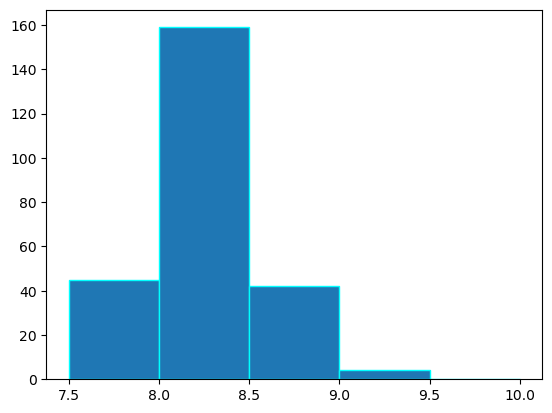

In [16]:
IMDb_Top_250=movies.sort_values(by='imdb_score',ascending=False)
IMDb_Top_250 = IMDb_Top_250.loc[IMDb_Top_250.num_voted_users > 25000]
IMDb_Top_250 = IMDb_Top_250.iloc[:250, ]
IMDb_Top_250['Rank'] = range(1,251)

import matplotlib.pyplot as plt
plt.hist(IMDb_Top_250['imdb_score'], bins = 5, range = (7.5,10), edgecolor = 'cyan')
plt.show()

#### <font color='red'>Question 7: Suppose movies are divided into 5 buckets based on the IMDb ratings: </font>
-  <font color='red'>7.5 to 8</font>
-  <font color='red'>8 to 8.5</font>
-  <font color='red'>8.5 to 9</font>
-  <font color='red'>9 to 9.5</font>
-  <font color='red'>9.5 to 10</font>

<font color = 'red'> Which bucket holds the maximum number of movies from *IMDb_Top_250*? </font>

**Subtask 3.4: Find the critic-favorite and audience-favorite actors**

   1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
   2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
   3. Group the combined dataframe using the `actor_1_name` column.
   4. Find the mean of the `num_critic_for_reviews` and `num_user_for_review` and identify the actors which have the highest mean.

In [18]:
Meryl_Streep = movies.loc[movies.actor_1_name == 'Meryl Streep']

In [19]:
Leo_Caprio = movies.loc[movies.actor_1_name == 'Leonardo DiCaprio']

In [20]:
Brad_Pitt = movies.loc[movies.actor_1_name == 'Brad Pitt']

In [21]:
# Write your code for combining the three dataframes here
Combined = pd.concat([Meryl_Streep, Brad_Pitt, Leo_Caprio])

In [22]:
# Write your code for grouping the combined dataframe here
Combined_by_segment = Combined.groupby('actor_1_name')

In [23]:
# Write the code for finding the mean of critic reviews and audience reviews here
Combined_by_segment['num_user_for_reviews'].mean()

actor_1_name
Brad Pitt            742.352941
Leonardo DiCaprio    914.476190
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64

#### <font color='red'>Question 8: Which actor is highest rated among the three actors according to the user reviews? </font>
-  <font color='red'>Meryl Streep</font>
-  <font color='red'>Leonardo DiCaprio</font>
-  <font color='red'>Brad Pitt</font>

#### <font color='red'>Question 9: Which actor is highest rated among the three actors according to the critics?</font>
-  <font color='red'>Meryl Streep</font>
-  <font color='red'>Leonardo DiCaprio</font>
-  <font color='red'>Brad Pitt</font>